# Weather Temperature Prediction

We will build a machine learning model to predict the temperature based on various weather features using a Random Forest Regressor. We will preprocess the data, train the model, evaluate its performance, and visualize the results.

## Importing Libraries

We will start by importing the necessary libraries for data manipulation, model building, and visualization.

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt

## Loading the Dataset

Next, we will load the dataset from a CSV file.

In [91]:
file_name = 'eindhoven-weather.csv'
file_path = os.path.join(os.getcwd(), file_name)
data = pd.read_csv(file_path)

data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),pressure_msl (hPa),wind_speed_10m (km/h)
0,2020-01-01T00:00,2.5,94,0.0,0.0,1034.8,10.0
1,2020-01-01T01:00,2.7,96,0.0,0.0,1034.7,9.5
2,2020-01-01T02:00,2.8,95,0.0,0.0,1034.1,8.8
3,2020-01-01T03:00,1.7,97,0.0,0.0,1033.9,8.6
4,2020-01-01T04:00,1.1,97,0.0,0.0,1033.6,9.3


## Data Preprocessing

We will preprocess the data by converting the 'time' column to datetime format and extracting relevant features such as hour, day, month, year, and whether the day is a weekend.

In [92]:
data['time'] = pd.to_datetime(data['time'])

data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
data['is_weekend'] = data['time'].dt.dayofweek >= 5

## Defining Features and Target Variable

We will define our features (X) and the target variable (y) for the model.

In [93]:
X = data.drop(['time', 'temperature_2m (°C)'], axis=1)
y = data['temperature_2m (°C)']

## Normalizing the Features

To improve the model's performance, we will normalize the features using `StandardScaler`.

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the Dataset

We will split the dataset into training and testing sets to evaluate the model's performance.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Building the Random Forest Regressor Model

We will create and fit a Random Forest Regressor model to the training data.

In [96]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## Making Predictions and Evaluating the Model

After fitting the model, we will make predictions on the test set and evaluate the model's performance using Mean Squared Error and R² Score.

In [97]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1.8450875245480922, 0.9620880168345672)

## Visualizing the Results

We will plot the actual temperatures against the predicted temperatures over time to visualize the model's performance.

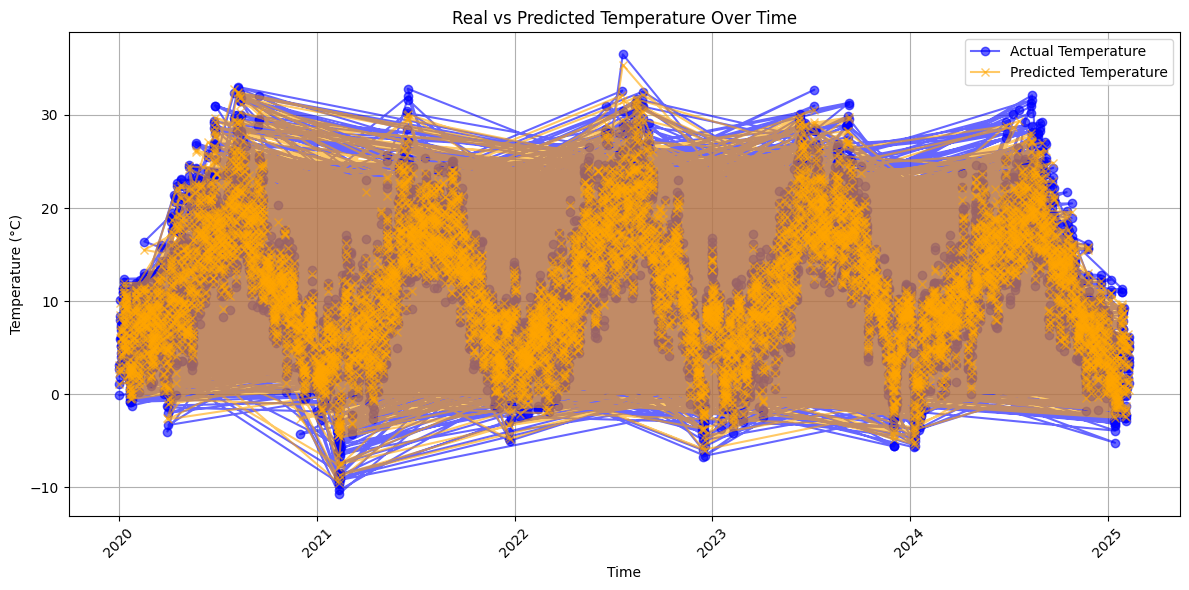

In [98]:
plt.figure(figsize=(12, 6))

time_test = data['time'].iloc[y_test.index]

plt.plot(time_test, y_test, color='blue', marker='o', label='Actual Temperature', alpha=0.6)
plt.plot(time_test, y_pred, color='orange', marker='x', label='Predicted Temperature', alpha=0.6)

plt.title('Real vs Predicted Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Making a Sample Prediction

How to make a prediction using a sample input.

In [99]:
sample_input = pd.DataFrame({
    'relative_humidity_2m (%)': [94],
    'precipitation (mm)': [0.00],
    'rain (mm)': [0.00],
    'pressure_msl (hPa)': [1034.8],
    'wind_speed_10m (km/h)': [10.0],
    'hour': [12],
    'day': [15],
    'month': [10],
    'year': [2023],
    'is_weekend': [0]
})

sample_input_scaled = scaler.transform(sample_input)

predicted_temperature = model.predict(sample_input_scaled)
predicted_temperature[0]
print(f'2023.10.15 12:00 Predicted Temperature: {predicted_temperature[0]} °C')

2023.10.15 12:00 Predicted Temperature: 10.669 °C
